In [11]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
import chirallag as cL

import matplotlib
matplotlib.rcParamsDefault

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import chirallag as cL
cf.reset()
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})


Memory Reset


2022-01-12 18:22:04.187843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 18:22:04.188144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 18:22:04.188332: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 18:22:04.188547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 18:22:04.188727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
def gen_and_load(n_pred,n_val):
    number_predictions= n_pred
    N = 3
    F0 = 1
    gens = cL.gen_gellman(3)
    pi=np.random.rand(number_predictions,N*N-1)
    dpi=np.random.rand(number_predictions,N*N-1)
    orig_V = cL.get_V(pi,dpi,gens,F0).real
    output = np.hstack((pi,dpi,np.expand_dims(orig_V,axis=1)))
    return [(output[:-n_val,:-1],output[:-n_val,-1]),(output[-n_val:,:-1],output[-n_val:,-1])]

In [14]:
data_prime = gen_and_load(10000,1)
_, pot_val = data_prime[0]

In [2]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data.csv',header = None))
train_x, train_y = df_pions[:-10000,:-1], (-df_pions[:-10000,-1])
val_x, val_y = df_pions[-10000:,:-1], (-df_pions[-10000:,-1])



In [3]:
unshuffled_potential_values = df_pions[:,-1].copy()
shufffled_potential_values = unshuffled_potential_values.copy()
np.random.shuffle(shufffled_potential_values)
random_mean_absolute_errro = np.mean(abs(unshuffled_potential_values-shufffled_potential_values/unshuffled_potential_values))
print('Random mape = ',random_mean_absolute_errro)
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))

Random mape =  1.9127877127009176
Mean Potential Value =  -0.13889586045126806


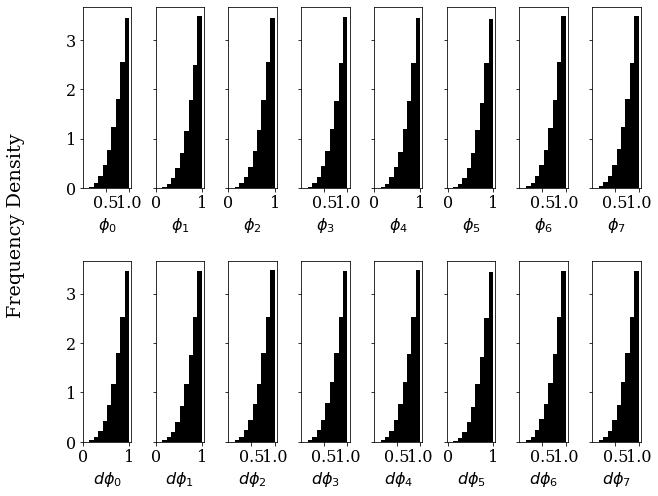

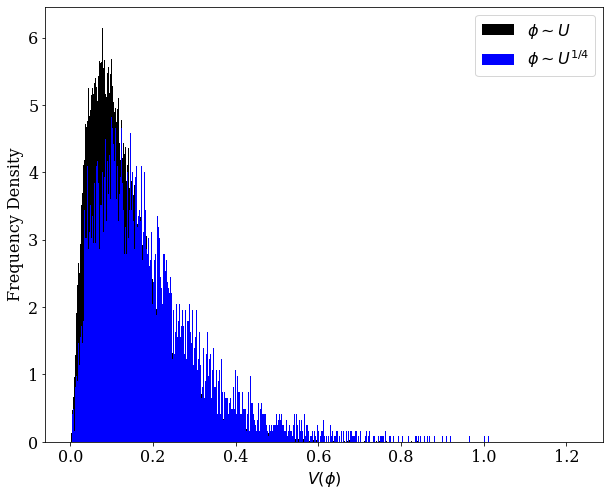

In [26]:
fig , ax = plt.subplots(2,8,sharey= True, figsize = (10,8))
plt.subplots_adjust(hspace= 0.4,wspace= 0.5)
for i in range(8):
    ax[0,i].hist(df_pions[:,i], density = True, color = 'black') 
    ax[1,i].hist(df_pions[:,8+i],density = True, color = 'black')
    ax[0,i].set_xlabel('$\phi_{{{}}}$'.format(i))
    ax[1,i].set_xlabel('$d\phi_{{{}}}$'.format(i))
fig.supylabel('Frequency Density')
fig_2 = plt.figure(figsize= (10,8))
plt.hist(train_y,density= True, bins = 1000, color = 'black',label=  '$\phi \sim U$')
plt.hist(abs(pot_val),density= True, bins = 1000, color = 'blue',label=  '$\phi \sim U^{1/4}$' )
plt.xlabel('$V(\phi)$')
plt.ylabel('Frequency Density')
plt.legend()

fig_2.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/both_dist.png',dpi = 300)

In [5]:
opt = keras.optimizers.Adam(amsgrad= True)


In [43]:

model = models.Sequential()

model.add(layers.Input(train_x.shape[1]))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(512,activation= 'relu',kernel_initializer= 'he_normal'))
model.add(layers.Dense(1))
model.compile(optimizer = opt,loss = 'mape', metrics = [['mean_absolute_error'],['mean_absolute_percentage_error']])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               8704      
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 271,873
Trainable params: 271,873
Non-trainable params: 0
_________________________________________________________________


In [38]:
epoch_num = 100

In [39]:

model.fit(train_x,train_y,validation_data=(val_x,val_y),batch_size= 256 , epochs = epoch_num)

Epoch 1/100
352/352 [==============================] - 1s 1ms/step - loss: 81.9536 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 81.9536 - val_loss: 58.3108 - val_mean_absolute_error: 0.0869 - val_mean_absolute_percentage_error: 58.3108
Epoch 2/100
352/352 [==============================] - 0s 1ms/step - loss: 53.6249 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 53.6249 - val_loss: 45.9570 - val_mean_absolute_error: 0.0633 - val_mean_absolute_percentage_error: 45.9570
Epoch 3/100
352/352 [==============================] - 0s 1ms/step - loss: 38.8774 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 38.8774 - val_loss: 33.7754 - val_mean_absolute_error: 0.0373 - val_mean_absolute_percentage_error: 33.7754
Epoch 4/100
352/352 [==============================] - 0s 1ms/step - loss: 31.4238 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 31.4238 - val_loss: 27.7560 - val_mean_absolute_error: 0.0320 - val_mean_absolute_percen

In [9]:
history = model.history
model.save('./batchsize16.h5')

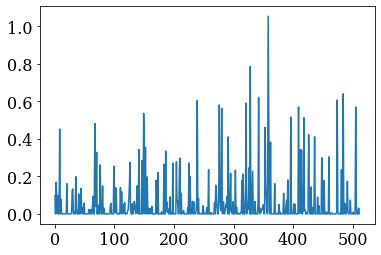

In [36]:
from keras import backend as K

get_relu_output = K.function([model.layers[0].input], [model.layers[1].output])
relu_output = get_relu_output([val_x])
mean_activ = np.mean(relu_output[0],axis=0)
plt.plot(mean_activ)

In [10]:
epoch_num = len(history.history['mean_absolute_error'])
epochs = np.arange(1,epoch_num+1)
mae = history.history['mean_absolute_error']
mape = np.array(history.history['mean_absolute_percentage_error'])
val_mae = np.array(history.history['val_mean_absolute_error'])
val_mape = np.array(history.history['val_mean_absolute_percentage_error'])
loss = history.history['loss']
val_loss = np.array(history.history['val_loss'])

In [11]:
print(np.min(val_mape)/4)

1.0703470706939697


In [12]:

val_mae_smooth = cf.exponetial_smoothing(val_mae,0.4)
val_loss_smooth = cf.exponetial_smoothing(val_loss,0.4)
val_mape_smooth = cf.exponetial_smoothing(val_mape,0.4)


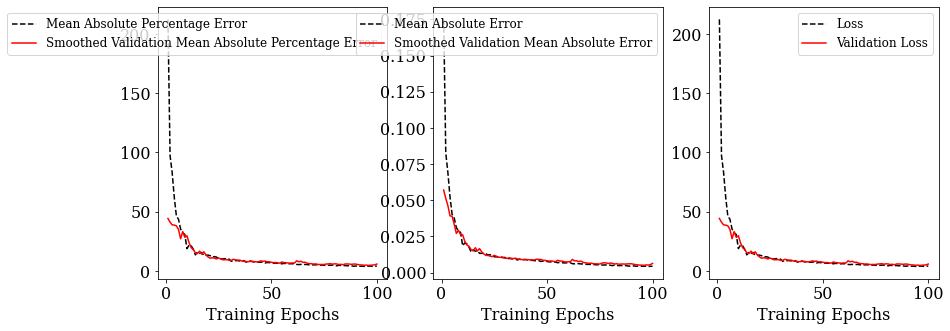

In [13]:
matplotlib.rcParams.update({'legend.fontsize': 12})
fig_3, axs  = plt.subplots(1,3, figsize= (14,5))
axs[0].plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs[0].plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Percentage Error')
axs[0].set_xlabel('Training Epochs')
#axs[0].set_yscale('log')
#axs[0].set_ylim(0,10)
axs[0].legend()

axs[1].plot(epochs,mae, c = 'black',linestyle = '--',label = 'Mean Absolute Error')
axs[1].plot(epochs,val_mae_smooth,c = 'red', label = 'Smoothed Validation Mean Absolute Error')
axs[1].set_xlabel('Training Epochs')
#axs[1].set_yscale('log')
axs[1].legend()

cut = None
axs[2].plot(epochs[:cut],loss[:cut], label = 'Loss',c = 'black',linestyle = '--')
axs[2].plot(epochs[:cut],val_loss_smooth[:cut], label = 'Validation Loss',c = 'red')
axs[2].set_xlabel('Training Epochs')
#axs[2].set_yscale('log')
axs[2].legend()

In [14]:
print('Mean Potential Value = ',np.mean(unshuffled_potential_values))
print('')

Mean Potential Value =  -0.13889586045126806



In [15]:
fig.savefig('../../Figures/Pions_uniform.png',dpi = 200)
fig_2.savefig('../../Figures/potential.png',dpi = 200)
fig_3.savefig('../../Figures/Inital_poc.png',dpi = 200)


In [16]:
test_data = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/testing_data_2.csv',header = None))
test_data.shape

(100000, 17)

In [17]:
#test = np.hstack((test_pi,test_dpi,test_V))
result = ((model.predict(test_data)))

ValueError: in user code:

    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/sean/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 16 but received input with shape (32, 17)


In [ ]:
mean = []
chunk = 100
chunk_size  = len(result)//chunk
for i in range(chunk):
    mean.append(np.mean(abs(np.array((result+test_V)/test_V))[chunk_size*i:chunk_size*(i+1)]))
mean = np.array(mean)
std = np.std(mean)
mean = np.mean(mean)
print('mean is = ', mean, 'STD is = ', std)



NameError: name 'test_V' is not defined

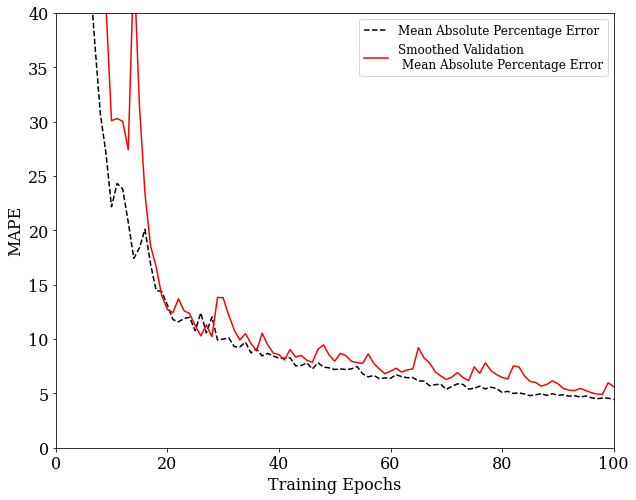

In [ ]:

fig_4, axs  = plt.subplots(1,1, figsize= (10,8))

axs.plot(epochs,mape, c = 'black',linestyle = '--',label = 'Mean Absolute Percentage Error')
axs.plot(epochs,val_mape_smooth,c = 'red', label = 'Smoothed Validation \n Mean Absolute Percentage Error')


axs.set_xlabel('Training Epochs', )
axs.set_ylabel('MAPE')
#axs.set_yscale('log')
axs.set_ylim(0,40)
axs.set_xlim(0,100)
axs.legend()



In [ ]:
fig_4.savefig('../../Figures/flat_yet_decreasing.png',dpi = 200)